In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv('./IB_statistics_data_HW6.txt', sep=' ')

In [7]:
df.sample(5)

,Ex3a.y,Ex3a.x1,Ex3a.x2,Ex3a.x3,Ex3b.y,Ex3b.x1,Ex3b.x2,Ex3b.x3,Ex5.y,Ex5.x1,Ex5.x2,Ex5.x3,Ex5.x4,Ex6b.y,Ex6b.x1,Ex6b.x2,Ex6b.x3,Ex6b.x4
40,3.488105,-1.387564,1.439958,-1.803995,4.471576,-0.268765,0.472555,-0.064526,-6.084809,1.272275,-0.187676,0.853364,0.397218,17.730979,-0.424153,-1.241720,-1.223322,-0.208231
33,11.443179,0.445174,0.347531,1.470551,8.502282,0.670668,-1.799044,0.540332,-1.527178,1.483599,0.468224,-0.283479,-0.605867,-14.013168,-0.605182,0.270061,-0.807854,0.869222
17,6.657932,0.514643,1.383030,-0.049992,-2.109551,0.942785,1.761111,-1.567183,11.141204,-1.960141,-0.393979,0.039556,0.331273,21.120059,-0.716557,0.876646,0.593599,-0.496311
15,9.561740,-0.130761,-0.251069,1.075696,7.690376,-0.322935,-0.640499,0.678307,27.211781,-1.045142,0.481817,2.595362,-0.643463,26.961682,1.216275,0.380130,0.675650,-0.491172
35,9.652117,-0.206231,0.414531,1.069140,4.224233,-0.027044,-0.180548,-0.082554,-4.889758,0.647928,0.414436,-0.655408,0.596774,2.390345,-0.581265,-0.771441,-1.160647,0.416840


### Task 1

$$\text{По теореме, оценка }\beta\text{ состоятельна, если минимальное собственное число матрицы }X^TX\text{ стремится к бесконечности по вероятности.}$$

$$\text{В условиях задачи:}$$

$$X^TX = |x_{1}^2 + x_{2}^2 + x_{3}^2 + ... + x_{n}^2|\text{- матрица из одного элемента}$$
$$x_{1}^2 + x_{2}^2 + x_{3}^2 + ... + x_{n}^2 - \lambda = 0$$
$$\lambda = x_{1}^2 + x_{2}^2 + x_{3}^2 + ... + x_{n}^2 => \lambda \rightarrow \inf\text{ при }n\rightarrow\inf$$

$$\text{Значит, оценка состоятельна.}$$

### Task 4

4a) 

4b) Воспользуемся простейшей моделью автокорреляции на основе случайных величин ~Norm(0, 1).

In [8]:
def autocorrelation_gen(r, n):
    val = np.random.normal()
    for i in range(0, n):
        yield val
        val = r*val + np.random.normal()
        
r = 0.99
n = 100
sample = [i for i in autocorrelation_gen(r, n)]

Correlogram (https://en.wikipedia.org/wiki/Correlogram)

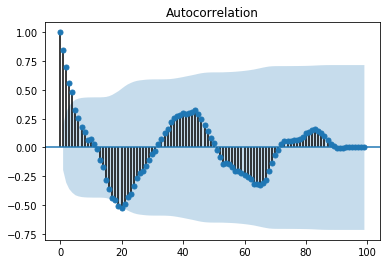

In [9]:
plot_acf(sample)
plt.show()

### Task 6

6a) 

$$ D = \frac{\sum_{k=2}^{n}(\epsilon_{k} - \epsilon_{k-1})^2}{\sum_{k=1}^{n}\epsilon_{k}^2} = \frac{\sum_{k=2}^n[\epsilon_{k}^2 - 2\epsilon_{k}\epsilon_{k-1} + \epsilon_{k-1}^2]}{\sum_{k=1}^{n}\epsilon_{k}^2} \approx 2 + 2\frac{\sum_{k=2}^{n}(\epsilon_{k}\epsilon_{k-1})}{\sum_{k=1}^{n}\epsilon_{k}^2} \approx 2(1 - r)$$

Здесь r - коэффициент автокорреляции 1 порядка. Рассмотрим крайние случаи:

$$D = 0, r=1$$
$$D = 4, r=-1$$

ч.т.д.

6b)

In [109]:
X = df[['Ex6b.x1', 'Ex6b.x2', 'Ex6b.x3', 'Ex6b.x4']].values
y = df['Ex6b.y'].values

lr = LinearRegression().fit(X, y)
predictions = lr.predict(X)
errors = y - predictions

In [111]:
n = errors.shape[0]
d1 = np.sum([(errors[i] - errors[i-1])**2 for i in range(1, n)])
d2 = np.sum([(errors[i])**2 for i in range(0, n)])
D = d1/d2
print(f"n={n}, D={D}")

n=74, D=0.7876106620034917


Для n=74 и уровня значимости 0.05:
$$ dL = 1.34, dR = 1.617 $$
$$ 0 < D < dL $$
Ответ: гипотеза об отсутствии корреляции отвергается против гипотезы о положительной корреляции.

6с)

Генерируем 10000 выборок и получаем значения статистики критерия Дарбина-Уотсона

In [102]:
def gen_sample(n):
    x1 = np.random.uniform(-0.5, 0.5, size=n)
    x2 = np.random.uniform(-1, 1, size=n)
    x3 = np.random.uniform(-1.5, 1.5, size=n)
    x4 = np.random.uniform(-2, 2, size=n)
    x5 = np.random.uniform(-2.5, 2.5, size=n)
    errors = np.random.normal(loc=0, scale=1e-3, size=n)
    X = np.array([x1, x2, x3, x4, x5]).reshape([n, 5])
    y = 0.2*x1 + x2/3 + -1*x3 + x4*0.5 + -0.25*x5 + 3 + errors
    return X, y

In [103]:
n = 111
n_samples=10000
D_v = []
for i in range(0, n_samples):
    X, y = gen_sample(n)
    lr = LinearRegression().fit(X, y)
    predictions = lr.predict(X)
    errors = y - predictions
    d1 = np.sum([(errors[i] - errors[i-1])**2 for i in range(1, n)])
    d2 = np.sum([(errors[i])**2 for i in range(0, n)])
    D = d1/d2
    D_v.append(D)

Для n=111 и уровня значимости 0.05:
$$ dL = 1.441, dR = 1.647 $$

In [107]:
dL = 1.441
dR = 1.647
traces = []
traces.append(go.Histogram(x=D_v, name='DW hist'))
traces.append(go.Scatter(x=[dL, dL], y=[0, 200], name='dL'))
traces.append(go.Scatter(x=[dR, dR], y=[0, 200], name='dR'))
traces.append(go.Scatter(x=[4-dL, 4-dL], y=[0, 200], name='4-dL'))
traces.append(go.Scatter(x=[4-dR, 4-dR], y=[0, 200], name='4-dR'))

fig = go.Figure(data=traces, layout=go.Layout(title=f'Durbin-Watson statistics distribution ({n_samples} samples)'))
iplot(fig)

Строим эмпирическую функцию распределения

In [95]:
class DurbinWatsonF():
    def __init__(self, D_v):
        self.D_v = np.array(sorted(D_v))
        self.n = self.D_v.shape[0]
    def F(self, x):
        return np.where(self.D_v < x)[0].shape[0] / self.n 

In [105]:
DWF = DurbinWatsonF(D_v)
x_v = []
y_v = []
for x in np.linspace(min(D_v), max(D_v), 10000):
    x_v.append(x)
    y_v.append(DWF.F(x))

trace = go.Scatter(x=x_v, y=y_v)
fig = go.Figure(data=[trace], layout=go.Layout(title=f'Durbin-Watson empirical distribution function'))
iplot(fig)